## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Importing the Excel Dataset 

In [68]:
data = pd.read_excel("Swiggy1.xlsx")

## 5 Initial Row of Dataset

In [69]:
data.head(5)

,restaurant_no,restaurant_name,city,address,rating,cost_per_person,cuisine,restaurant_link,menu_category,item,price,veg_or_non-veg
0,1,Tandoor Hut,Bangalore,"Tandoor Hut, 477, KHB Colony, 5th Block, Koram...",4.3,300.0,"Biryani,Chinese",https://www.swiggy.com/restaurants/tandoor-hut...,Accompaniments,Roasted Papad,35,Veg
1,1,Tandoor Hut,Bangalore,"Tandoor Hut, 477, KHB Colony, 5th Block, Koram...",4.3,300.0,"Biryani,Chinese",https://www.swiggy.com/restaurants/tandoor-hut...,Accompaniments,Fried Papad,40,Veg
2,1,Tandoor Hut,Bangalore,"Tandoor Hut, 477, KHB Colony, 5th Block, Koram...",4.3,300.0,"Biryani,Chinese",https://www.swiggy.com/restaurants/tandoor-hut...,Indian Breads,Tandoori Roti (1 Pc),45,Veg
3,1,Tandoor Hut,Bangalore,"Tandoor Hut, 477, KHB Colony, 5th Block, Koram...",4.3,300.0,"Biryani,Chinese",https://www.swiggy.com/restaurants/tandoor-hut...,Indian Breads,Butter Roti,50,Veg
4,1,Tandoor Hut,Bangalore,"Tandoor Hut, 477, KHB Colony, 5th Block, Koram...",4.3,300.0,"Biryani,Chinese",https://www.swiggy.com/restaurants/tandoor-hut...,Indian Breads,Plain Kulcha (1 Pc),50,Veg


## Checking the Shape of the Dataset

In [4]:
data.shape

(50046, 12)

## Removing the Unnecssary Columns

In [5]:
data.drop(columns=["address",'restaurant_link'],inplace=True)

## Description of Dataset

In [6]:
data.describe()

,restaurant_no,rating,cost_per_person
count,50046.000000,50046.000000,50030.000000
mean,180.282820,4.100717,376.099220
std,101.423014,0.273316,183.280802
min,1.000000,2.600000,48.000000
25%,95.000000,4.000000,250.000000
50%,187.000000,4.100000,350.000000
75%,267.000000,4.300000,450.000000
max,350.000000,4.700000,1100.000000


## Information of the Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50046 entries, 0 to 50045
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_no    50046 non-null  int64  
 1   restaurant_name  50046 non-null  object 
 2   city             50046 non-null  object 
 3   rating           50046 non-null  float64
 4   cost_per_person  50030 non-null  float64
 5   cuisine          50046 non-null  object 
 6   menu_category    50030 non-null  object 
 7   item             50030 non-null  object 
 8   price            50046 non-null  object 
 9   veg_or_non-veg   50030 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.8+ MB


## Checking the Missing or Null Values in Dataset

In [8]:
data.isnull().sum()

restaurant_no       0
restaurant_name     0
city                0
rating              0
cost_per_person    16
cuisine             0
menu_category      16
item               16
price               0
veg_or_non-veg     16
dtype: int64

## Converting the type of price from object into float

In [71]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')

## Now again checking the information

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50046 entries, 0 to 50045
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_no    50046 non-null  int64  
 1   restaurant_name  50046 non-null  object 
 2   city             50046 non-null  object 
 3   address          50030 non-null  object 
 4   rating           50046 non-null  float64
 5   cost_per_person  50030 non-null  float64
 6   cuisine          50046 non-null  object 
 7   restaurant_link  50046 non-null  object 
 8   menu_category    50030 non-null  object 
 9   item             50030 non-null  object 
 10  price            50030 non-null  float64
 11  veg_or_non-veg   50030 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 4.6+ MB


## Removing the Null Values permanently 

In [11]:
data.dropna(inplace=True)

## Checking the Null Values

In [12]:
data.isnull().sum()

restaurant_no      0
restaurant_name    0
city               0
rating             0
cost_per_person    0
cuisine            0
menu_category      0
item               0
price              0
veg_or_non-veg     0
dtype: int64

## Veg Vs Non Veg

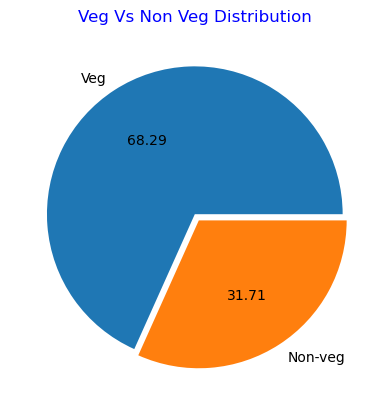

In [62]:
veg_Non_veg = data['veg_or_non-veg'].value_counts()
label = veg_Non_veg.index
count = veg_Non_veg.values
plt.pie(x=count,labels=label,explode=(0,0.05),autopct='%.2f')
plt.title("Veg Vs Non Veg Distribution",color="Blue")

plt.show()

## Counts of Top 10 Menu Category

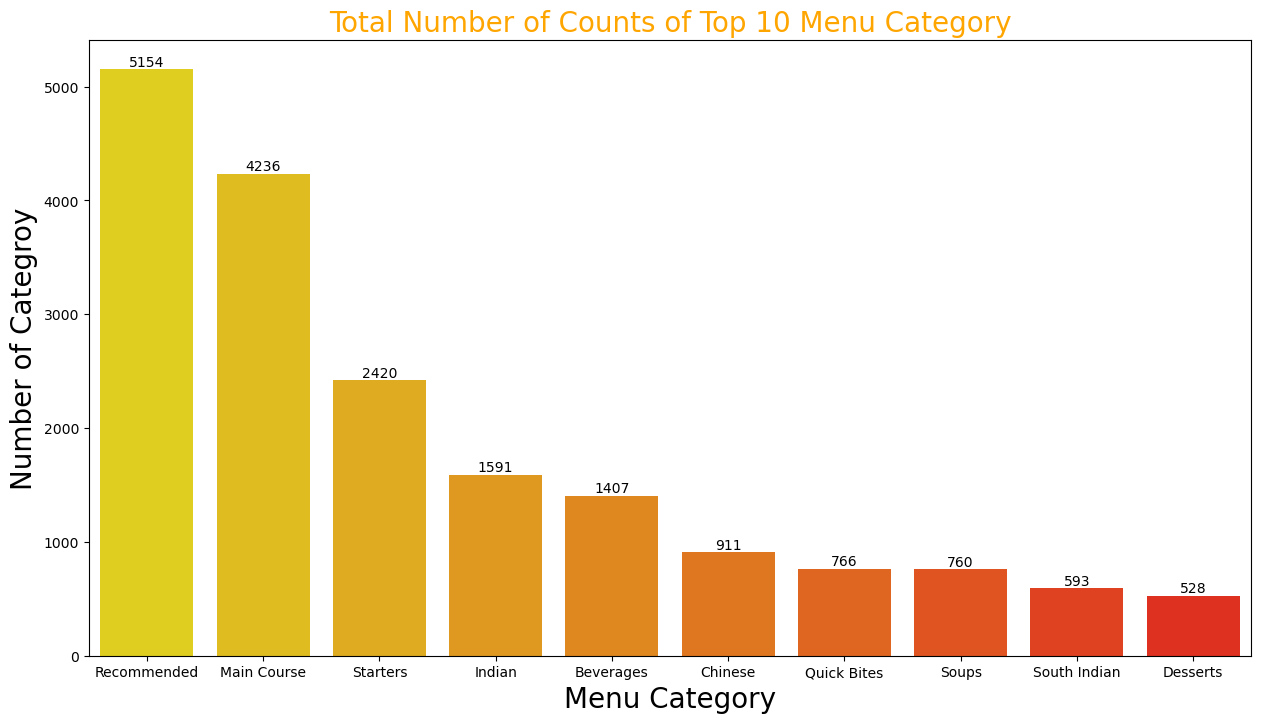

In [15]:
plt.figure(figsize=(15,8))
top_10 = data['menu_category'].value_counts().nlargest(10).index
filtered_df = data[data['menu_category'].isin(top_10)]
ax =sns.countplot(x=data["menu_category"],data=filtered_df, order=top_10,palette="autumn_r")
plt.title("Total Number of Counts of Top 10 Menu Category",fontsize=20,fontweight=50,color="orange")
plt.xlabel("Menu Category",fontsize=20,fontweight=50)
plt.ylabel('Number of Categroy',fontsize=20,fontweight=50)


for bar in ax.containers:
    ax.bar_label(bar)

## Counts of Top 10 Items

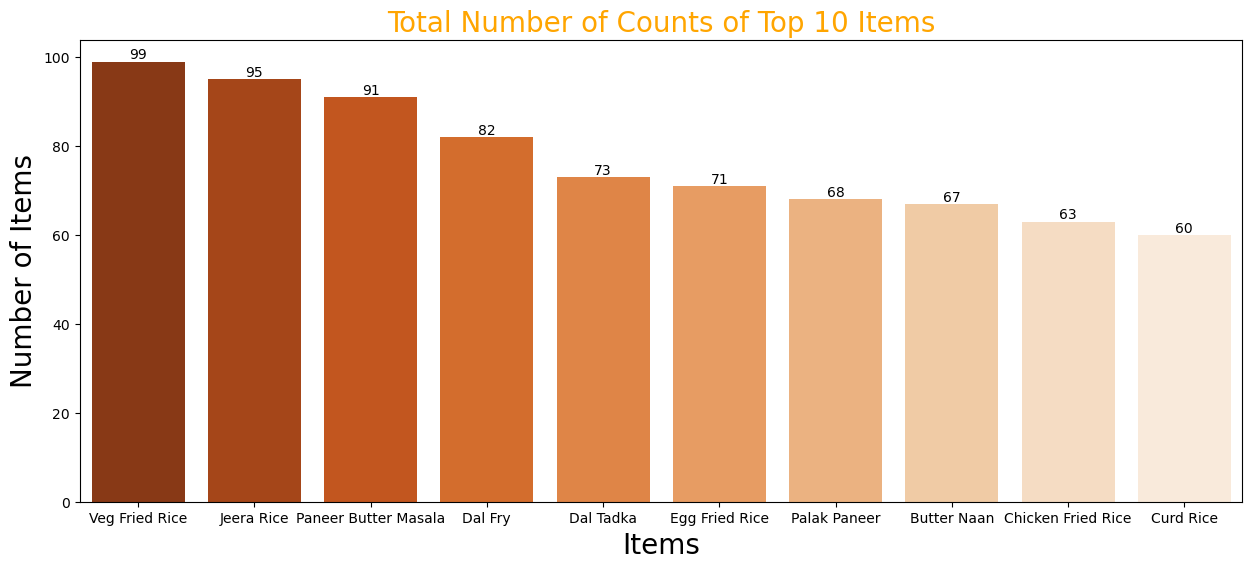

In [16]:
plt.figure(figsize=(15,6))
top_10 = data['item'].value_counts().nlargest(10).index
filtered_df = data[data['item'].isin(top_10)]
ax = sns.countplot(x=data["item"],data=filtered_df, order=top_10,palette="Oranges_r")
plt.title("Total Number of Counts of Top 10 Items",fontsize=20,fontweight=50,color="orange")
plt.xlabel("Items",fontsize=20,fontweight=50)
plt.ylabel('Number of Items',fontsize=20,fontweight=50)

for bar in ax.containers:
    ax.bar_label(bar)

## Counts of Top 10 Cuisine

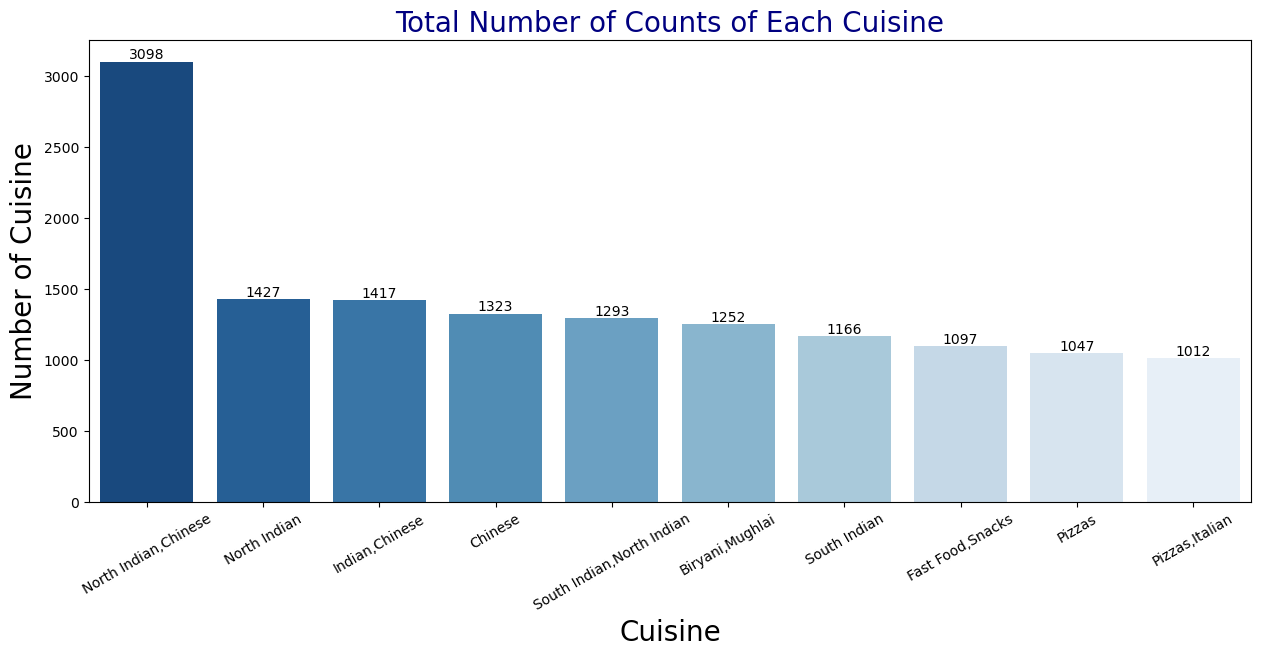

In [28]:
plt.figure(figsize=(15,6))
top_10 = data['cuisine'].value_counts().nlargest(10).index
filtered_df = data[data['cuisine'].isin(top_10)]
ax = sns.countplot(x=data["cuisine"],data=filtered_df, order=top_10,palette="Blues_r")
plt.xticks(rotation=30)
plt.title("Total Number of Counts of Each Cuisine",fontsize=20,fontweight=50,color="Navy")
plt.xlabel("Cuisine",fontsize=20,fontweight=50)
plt.ylabel('Number of Cuisine',fontsize=20,fontweight=50)


for bar in ax.containers:
    ax.bar_label(bar)

## Bangalore Vs Ahmedabad

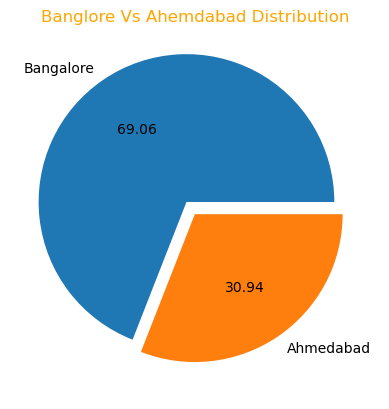

In [65]:
cities = data['city'].value_counts()
label = cities.index
count = cities.values

# label = Banglore and Ahemdabad

plt.pie(x=count,labels=label,autopct='%.2f',explode = (0.1,0))
plt.title("Banglore Vs Ahemdabad Distribution",c="orange",fontweight=20)
plt.show()



## Distribution of Restaurant Ratings

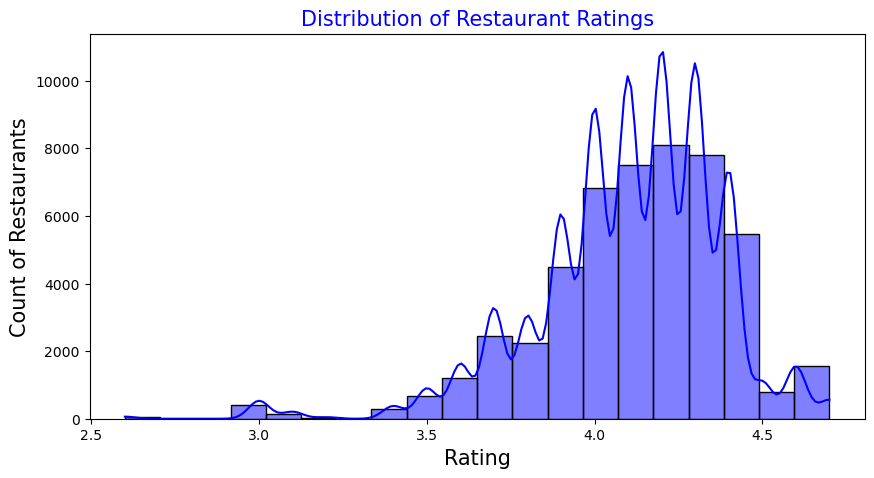

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins=20, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings",fontsize=15,fontweight=50,color="blue")
plt.xlabel("Rating",fontsize=15,fontweight=50)
plt.ylabel("Count of Restaurants",fontsize=15,fontweight=50)
plt.show()

## Average cost for per person in cities

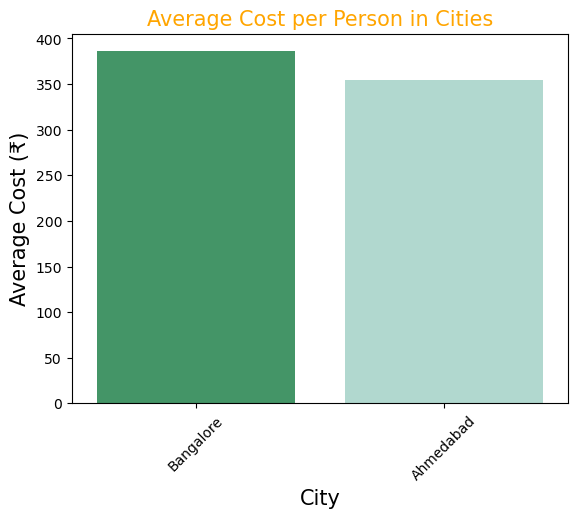

In [99]:
# plt.figure(figsize=(12, 6))
avg_cost_per_city = data.groupby('city')['cost_per_person'].mean().dropna().sort_values(ascending=False).head(10)
ax = sns.barplot(x=avg_cost_per_city.index, y=avg_cost_per_city.values, palette="BuGn_r")
plt.title("Average Cost per Person in Cities",fontsize=15,fontweight=50,color="orange")
plt.xlabel("City",fontsize=15,fontweight=50)
plt.ylabel("Average Cost (₹)",fontsize=15,fontweight=50)
plt.xticks(rotation=45)
plt.show()
 

## Average cost for Veg and Non Veg

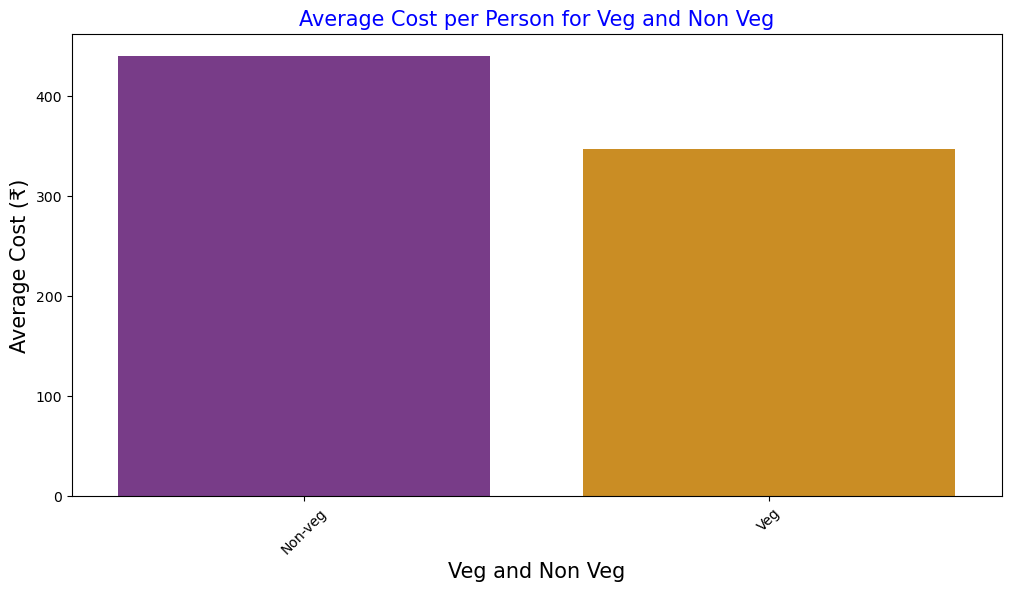

In [100]:
plt.figure(figsize=(12, 6))
avg_cost_per_city = data.groupby('veg_or_non-veg')['cost_per_person'].mean().dropna().sort_values(ascending=False).head(10)
ax = sns.barplot(x=avg_cost_per_city.index, y=avg_cost_per_city.values, palette="CMRmap")
plt.title("Average Cost per Person for Veg and Non Veg",fontsize=15,fontweight=50,color="Blue")
plt.xlabel("Veg and Non Veg",fontsize=15,fontweight=50)
plt.ylabel("Average Cost (₹)",fontsize=15,fontweight=50)
plt.xticks(rotation=45)
plt.show()
 

## Price Distribution of Food Items

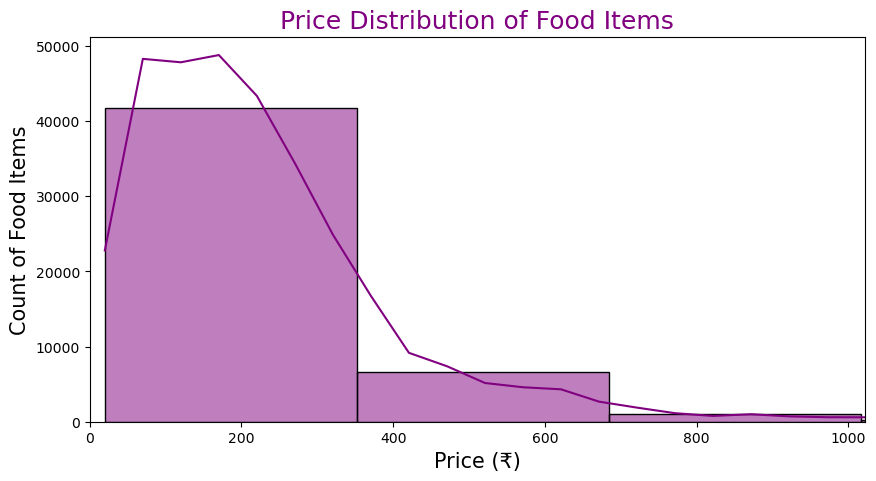

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data['price'], bins=30, kde=True, color="purple")
plt.title("Price Distribution of Food Items",fontsize=18,fontweight=50,color="purple")
plt.xlabel("Price (₹)",fontsize=15,fontweight=50)
plt.ylabel("Count of Food Items",fontsize=15,fontweight=50)
plt.xlim(0, data['price'].dropna().quantile(0.99))
plt.show()

## Top 10 Highest Rated Restaurants

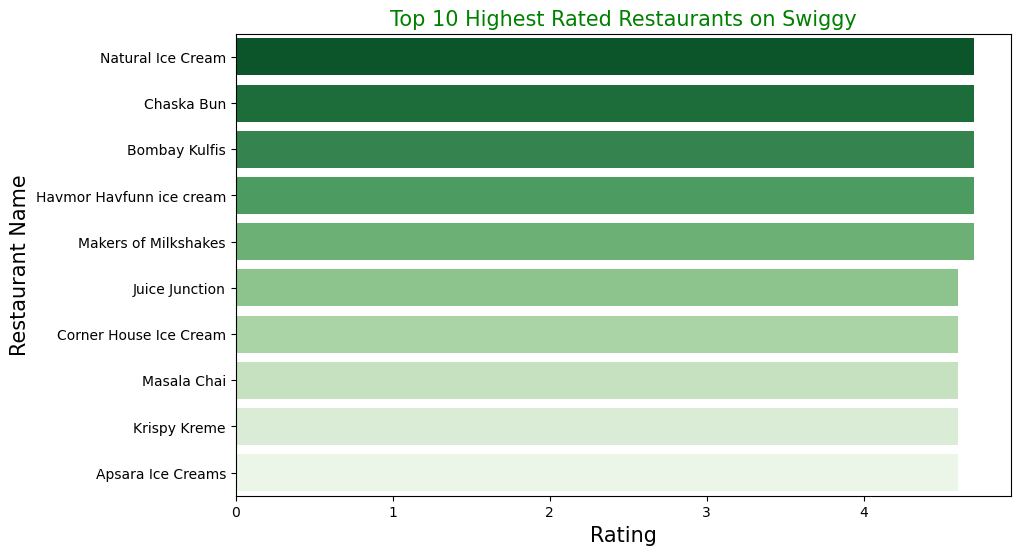

In [66]:
plt.figure(figsize=(10,6))
top_rated_resturent= data[['restaurant_name','rating']].drop_duplicates().nlargest(10,'rating')
sns.barplot(y=top_rated_resturent['restaurant_name'],x=top_rated_resturent['rating'],palette='Greens_r')
plt.xlabel("Rating",fontsize=15,fontweight=50)
plt.ylabel("Restaurant Name",fontsize=15,fontweight=50)
plt.title("Top 10 Highest Rated Restaurants on Swiggy",fontsize=15,fontweight=50,color='green')
plt.show()

## Item Vs Total Price

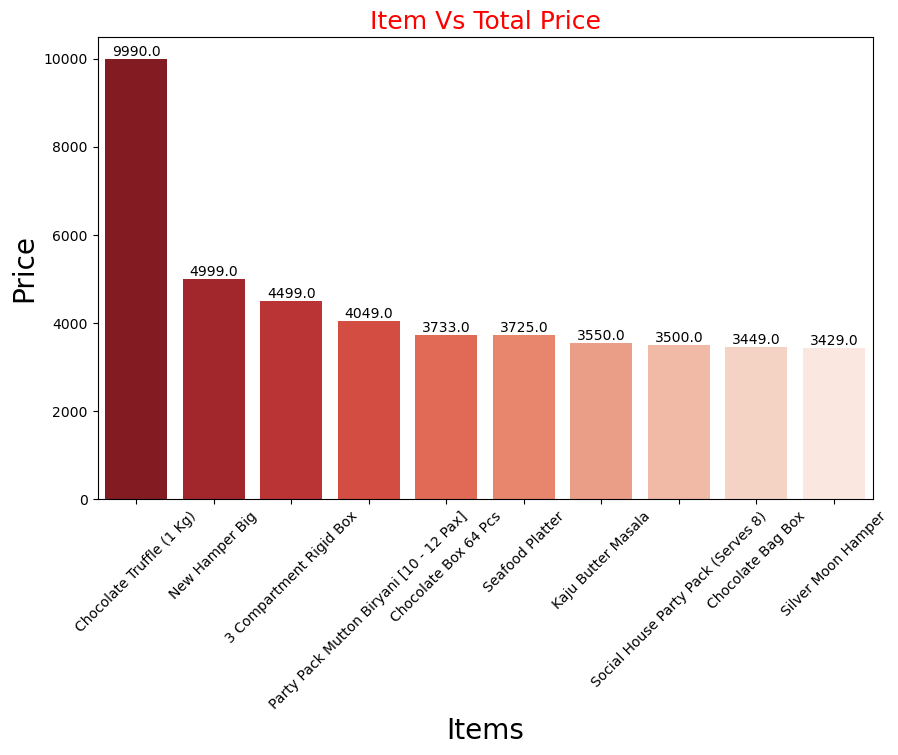

In [31]:
plt.figure(figsize=(10,6))
most_expensive_items = data[['item','price']].dropna().nlargest(11,'price')
ax= sns.barplot(x=most_expensive_items['item'],y=most_expensive_items['price'],palette="Reds_r")
plt.title("Item Vs Total Price",fontsize=18,fontweight=50,color="Red")
plt.xlabel("Items",fontsize=20,fontweight=50)
plt.ylabel("Price",fontsize=20,fontweight=50)
plt.xticks(rotation=45)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,  # X position
            bar.get_height(),                 # Y position (height of the bar)
            f'{bar.get_height():.1f}',        # Label (formatted)
            ha='center', va='bottom')
plt.show()

## Rating to Top 10 Items

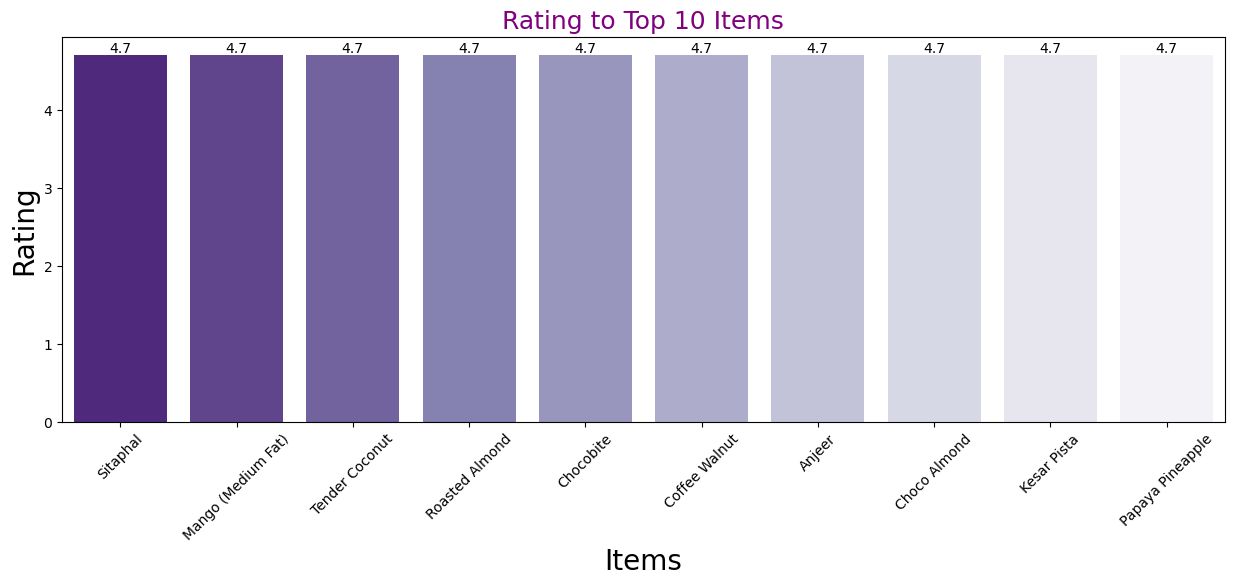

In [24]:
plt.figure(figsize=(15,5))
most_expenseive_cusine = data[['item','rating']].dropna().nlargest(10,'rating')
ax=sns.barplot(x=most_expenseive_cusine['item'],y=most_expenseive_cusine['rating'],palette='Purples_r')
plt.title("Rating to Top 10 Items",fontsize=18,fontweight=50,color="purple")
plt.xlabel("Items",fontsize=20,fontweight=50)
plt.ylabel("Rating",fontsize=20,fontweight=50)
plt.xticks(rotation=45)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,  # X position
            bar.get_height(),                 # Y position (height of the bar)
            f'{bar.get_height():.1f}',        # Label (formatted)
            ha='center', va='bottom') 
plt.show()

## Cuisine Vs Total Price

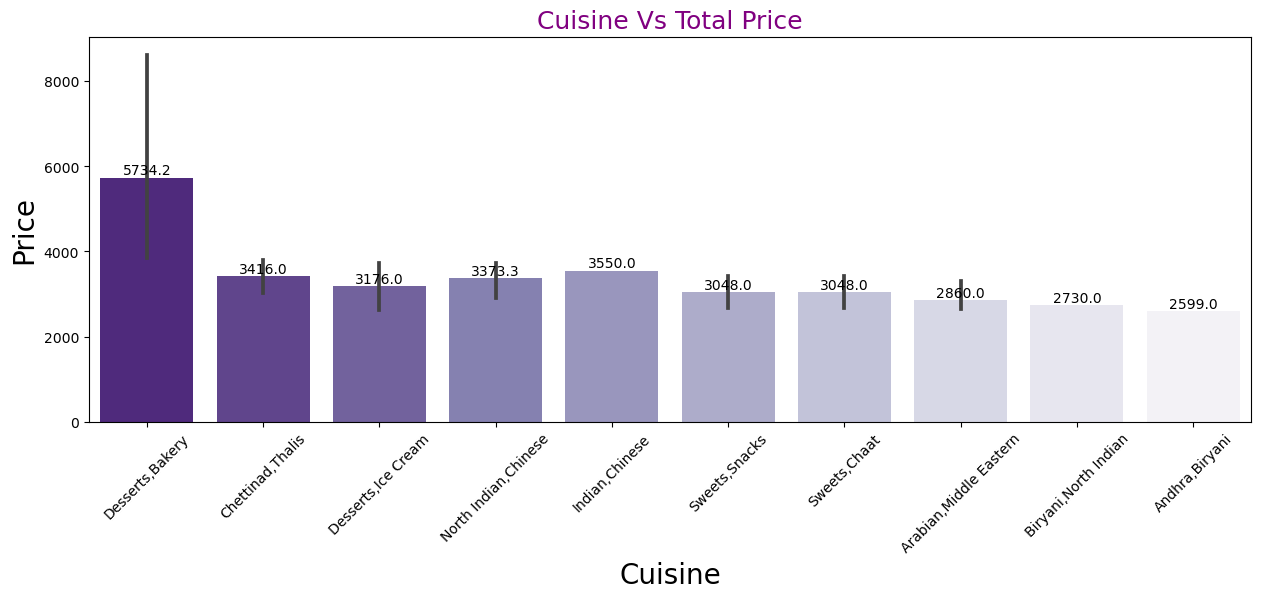

In [32]:
plt.figure(figsize=(15,5))
most_expenseive_cusine = data[['cuisine','price']].dropna().nlargest(25,'price')
ax= sns.barplot(x=most_expenseive_cusine['cuisine'],y=most_expenseive_cusine['price'],palette='Purples_r')
plt.title("Cuisine Vs Total Price",fontsize=18,fontweight=50,color="purple")
plt.xlabel("Cuisine",fontsize=20,fontweight=50)
plt.ylabel("Price",fontsize=20,fontweight=50)
plt.xticks(rotation=45)

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,  # X position
            bar.get_height(),                 # Y position (height of the bar)
            f'{bar.get_height():.1f}',        # Label (formatted)
            ha='center', va='bottom') 
plt.show()

## Rating of Top 10 Cuisine

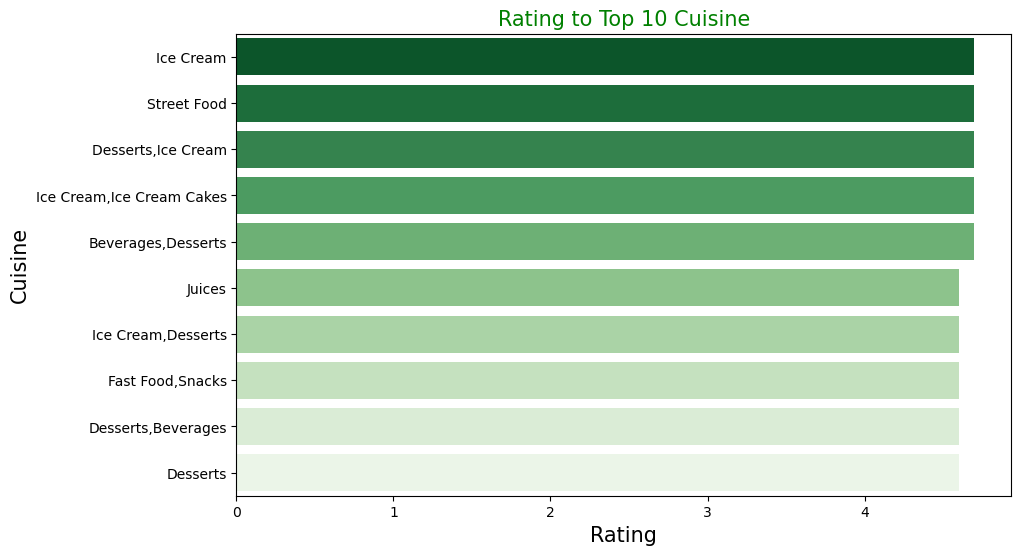

In [27]:
plt.figure(figsize=(10,6))
top_rated_resturent= data[['cuisine','rating']].drop_duplicates().nlargest(10,'rating')
sns.barplot(y=top_rated_resturent['cuisine'],x=top_rated_resturent['rating'],palette='Greens_r')
plt.xlabel("Rating",fontsize=15,fontweight=50)
plt.ylabel("Cuisine",fontsize=15,fontweight=50)
plt.title("Rating of Top 10 Cuisine",fontsize=15,fontweight=50,color='green')
plt.show()
plt.show()